# Limpieza y transformación de la data disponible

Se crea un dataset integro y disponible para los usuarios de los datos en un archivo llamado **formatted_data.csv** en la carpeta datasets de este trabajo de la encuesta de cali

## Objetivos

- Proveer de un dataset con calidad para realizar procedimientos estadísticos, asegurando la integridad y disponibilidad de ellos.

- Generar documentación que sustente cada procedimiento de transformación sobre los datos entendible para cualquier tipo de público

## Requerimientos

- Se requiere que los datos estén almacenados sobre la carpeta del proyecto 

~~~
CARPETA TRABAJO > datasets > {2020} > {capitulo}
~~~

Donde capitulo corresponde a el capitulo de los datos dentro de la encuesta (ej. Características y composición del hogar)  

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import cv2
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/Shared drives/Tecnicas de aprendizaje estadistico/Trabajo 1")

Mounted at /content/drive


## Funciones auxiliares

#### Transformación de preguntas cerradas
La transformación se realiza sobre columnas con respuesta de si o no y opcionalmente con la opción no informar

| Valor | Valor semantico | Valor destino |
| ----- | --------------- | ------------- |
| 1     | si              | True          |
| 2     | no              | False         |
| 3     | no informa      | NAN           |

In [42]:
def transform_close_question(data_frame, column):
  # 1 si -> True
  # 2 no -> False
  # 3 no informa -> Nan
  data_frame.loc[data_frame[column] == 1, column] = True
  data_frame.loc[data_frame[column] == 2, column] = False
  data_frame.loc[data_frame[column] == 3, column] = np.nan
transformar_pregunta_cerrada = transform_close_question

#### Transformación de preguntas de selección múltiple

Preguntas que tienen más de 2 respuestas que carecen de sentido númerico o de orden. Se convierten a variables de tipo string para separar subgrupos, sin embargo, este grupo númerico se guarda con el sufijo "_n"

In [43]:
def transform_multiple_selection_question(data_frame, column, prefix):
  # convierte string con un prefijo después el número
  data_frame[column+"_n"] = data_frame[column]
  data_frame[column] = prefix + data_frame[column].astype(str)

## Lectura de los datos

Se hace una recolección de los datos según los requerimientos anteriormente estipulados para poder correr este script

In [44]:
metadata = {
    "estudio": "Encuesta calidad de vida",
    "renombramientos": {},
    "secciones":{},
    "capitulos": ["Datos de la vivienda", 
                  "Servicios del hogar",
                  "Caracteristicas y composicion del hogar",
                  "Salud", 
                  "Educacion", 
                  "Tecnologias de informacion y comunicacion",
                  "Fuerza de trabajo",
                  "Trabajo infantil"] # Dejar en primer lugar el dataset de datos vivienda.
}

In [45]:
def read_data(carpeta_encuestas, año, cap):
  base_ = carpeta_encuestas+"/"+año
  exts = [file_out.split('.') for file_out in os.listdir(base_) if file_out.startswith(cap)]
  
  if exts:  # exits
    print(carpeta_encuestas, año, cap, exts[0])
    route = base_+"/"+cap+'.'+exts[0][1]

    if exts[0][1] == 'csv':
      buffer_df = pd.read_csv(route, sep=";", decimal=",")
    elif exts[0][1] == 'txt':
      buffer_df = pd.read_csv(route, sep="	", decimal=",")
    else:
      raise AssertionError("No está en ninguna de las vueltas")
    buffer_df["año_encuesta"] = año
    return buffer_df
  else:
    print(f'No se encontro ningún archivo {año} > {cap}')

In [46]:
# Recolección de datos en el archivo
caps = metadata['capitulos']
base = 'datasets'
carpeta_encuestas = f'{base}/ECV'
data = dict()
for año in os.listdir(carpeta_encuestas):
  for cap in caps:
    if not cap in data:
      data[cap] = read_data(carpeta_encuestas, año, cap)
    else:
      buffer_df = read_data(carpeta_encuestas, año, cap)
      data[cap] = pd.concat([data[cap], buffer_df])

datasets/ECV 2020 Datos de la vivienda ['Datos de la vivienda', 'csv']
datasets/ECV 2020 Servicios del hogar ['Servicios del hogar', 'csv']
datasets/ECV 2020 Caracteristicas y composicion del hogar ['Caracteristicas y composicion del hogar', 'csv']
datasets/ECV 2020 Salud ['Salud', 'csv']
datasets/ECV 2020 Educacion ['Educacion', 'csv']
datasets/ECV 2020 Tecnologias de informacion y comunicacion ['Tecnologias de informacion y comunicacion', 'csv']
datasets/ECV 2020 Fuerza de trabajo ['Fuerza de trabajo', 'csv']
datasets/ECV 2020 Trabajo infantil ['Trabajo infantil', 'csv']
No se encontro ningún archivo 2008 > Datos de la vivienda
No se encontro ningún archivo 2008 > Servicios del hogar


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if __name__ == '__main__':


No se encontro ningún archivo 2008 > Caracteristicas y composicion del hogar
No se encontro ningún archivo 2008 > Salud
No se encontro ningún archivo 2008 > Educacion
No se encontro ningún archivo 2008 > Tecnologias de informacion y comunicacion
No se encontro ningún archivo 2008 > Fuerza de trabajo
No se encontro ningún archivo 2008 > Trabajo infantil


In [47]:
# Unión de todas los datasets por (el/los) campo's que identifiquen a la persona
keys = list(data.keys())
df = data[keys[0]]

cols = set(df.columns)

for i in range(1, len(keys)):
  joiner = set(data[keys[i]].columns) & cols
  df = df.merge(data[keys[i]], on=list(joiner), how="outer")
del keys

n = df.shape[0]
print(f"Son un total de {n} encuestados")

Son un total de 267194 encuestados


In [48]:
df[df.año_encuesta == 2015]

,DIRECTORIO,SECUENCIA_ENCUESTA,SECUENCIA_P,ORDEN,P1_DEPARTAMENTO,CLASE,FEX_C,CANT_HOG_COMPLETOS,CANT_HOGARES_VIVIENDA,P2102,...,P5971S6,P5971S6A1,P5971S7,P5971S7A1,P5971S8,P5971S8A1,P5971S9,P5971S9A1,P5971S10,P5971S10A1


In [49]:
n = len(df)

### Renombramiento de columnas entendibles y su respectivo tipo de dato

Dependiendo del contexto se renombran las columnas del dataframe para evitar confusiones y mejorar el entendimiento de la data por parte de los usuarios de la data limpia

#### Caracterización y composición del hogar

Según el diccionario de datos [Data File: Caracteristicas y composicion del hogar](https://microdatos.dane.gov.co/index.php/catalog/718/datafile/F3)

Se realizan las siguientes transformaciones

Por lo que se logra identificar de los datos y de la estructura se toman los siguientes supuestos

- Un directorio es un hogar
- Una secuencia encuesta es el identificador de la visita que se le hace a determinado hogar
- Una secuencia p es el identificador de una persona en concreto al interior del hogar

In [50]:
metadata["renombramientos"]["DIRECTORIO"] = "hogar"
metadata["renombramientos"]["SECUENCIA_ENCUESTA"] = "id_visita"
metadata["renombramientos"]["SECUENCIA_P"] = "id_persona_hogar"


metadata["renombramientos"]["P6016"] = "num_orden"
metadata["renombramientos"]["P1894"] = "tipo_documento"
metadata["renombramientos"]["P6020"] = "sexo"
metadata["renombramientos"]["P6034"] = "digita_fecha_nacimiento"  # Nos sirve?
metadata["renombramientos"]["P6040"] = "años_cumplidos"
metadata["renombramientos"]["P6051"] = "parentesco_jefe_hogar"
metadata["renombramientos"]["P5502"] = "estado_civil"

metadata["renombramientos"]["P6071"] = "vive_con_conyuge_hogar"

metadata["renombramientos"]["P6071S1"] = "orden_conyuge"

metadata["renombramientos"]["P756"] = "nacio_donde_vive"
metadata["renombramientos"]["P756S1"] = "departamento_nacimiento"
metadata["renombramientos"]["P756S2"] = "municipio_nacimiento"
metadata["renombramientos"]["P756S3"] = "nacio_otro_pais"

metadata["renombramientos"]["P6074"] = "siempre_vivido_municipio"
metadata["renombramientos"]["P767"] = "años_viviendo_municipio"

metadata["renombramientos"]["P6076"] = "antes_vivir_aqui_donde_vivia"
metadata["renombramientos"]["P6076S1"] = "antes_vivir_aqui_donde_vivia_departamento"
metadata["renombramientos"]["P6076S2"] = "antes_vivir_aqui_donde_vivia_municipio"
metadata["renombramientos"]["P6077"] = "antes_vivir_aqui_donde_vivia_urbano"
metadata["renombramientos"]["P6096"] = "razon_cambio_residencia"

metadata["renombramientos"]["P6081"] = "padre_vive_en_residencia"
metadata["renombramientos"]["P6081S1"] = "orden_padre"
metadata["renombramientos"]["P6087"] = "nivel_educacion_padre"  # int 1 - 10

metadata["renombramientos"]["P6083"] = "madre_vive_en_residencia"
metadata["renombramientos"]["P6083S1"] = "orden_madre"
metadata["renombramientos"]["P6088"] = "nivel_educacion_madre"  # int 1 - 10

metadata["renombramientos"]["P6080"] = "grupo_etnico"
metadata["renombramientos"]["P5667"] = "pueblo_indigena"

metadata["renombramientos"]["P2057"] = "campesino"

metadata["renombramientos"]["P2059"] = "fue_campesino"
metadata["renombramientos"]["P2061"] = "comunidad_campesina"

metadata["renombramientos"]["P6426"] = "meses_trabajo" 
metadata["renombramientos"]["CANT_PERSONAS_HOGAR"] = "cantidad_personas_hogar" 


## De la vida con escala de 0 a 10

metadata["renombramientos"]["P1895"] = "satisfaccion_vida"
metadata["renombramientos"]["P1896"] = "satisfaccion_ingreso"
metadata["renombramientos"]["P1897"] = "satisfaccion_salud"
metadata["renombramientos"]["P1898"] = "satisfaccion_nivel_seguridad"
metadata["renombramientos"]["P1899"] = "satisfaccion_trabajo"
metadata["renombramientos"]["P3175"] = "satisfaccion_tiempo_libre"

metadata["renombramientos"]["P1901"] = "felicidad_ayer"
metadata["renombramientos"]["P1903"] = "preocupado_ayer"
metadata["renombramientos"]["P1904"] = "triste_ayer"

metadata["renombramientos"]["P1905"] = "cosas_en_vida_valen_la_pena"
metadata["renombramientos"]["P1927"] = "escala_vida"

#Renombramientos Salud y educación
metadata["renombramientos"]["P783"] = "nivel_de_educacion"
metadata["renombramientos"]["P6127"] = "estado_de_salud"

#Renombramientos Servicios publicos
metadata["renombramientos"]["P8520S1"] = "tiene_energia"
metadata["renombramientos"]["P8520S5"] = "tiene_acueducto"
metadata["renombramientos"]["P8520S3"] = "tiene_alcantarillado"
metadata["renombramientos"]["P8520S4"] = "tiene_recoleccion_basuras"
metadata["renombramientos"]["P1085S1"] = "accede_internet_hogar"

#Desastres naturales
metadata["renombramientos"]["P4065S1"] = "inundaciones"
metadata["renombramientos"]["P4065S2"] = "avalanchas"
metadata["renombramientos"]["P4065S3"] = "hundimiento_terreno"
metadata["renombramientos"]["P4065S4"] = "tormentas"
metadata["renombramientos"]["P4065S5"] = "sismo"

#Caracteristicas barrio
metadata["renombramientos"]["P5661S1"] = "ruidos_exteriores"
metadata["renombramientos"]["P5661S2"] = "malos_olores"
metadata["renombramientos"]["P5661S3"] = "presencia_basuras"
metadata["renombramientos"]["P5661S4"] = "contaminacion_aire"
metadata["renombramientos"]["P5661S9"] = "contaminacion_rios"
metadata["renombramientos"]["P5661S5"] = "invasion_espacio_publico"
metadata["renombramientos"]["P5661S6"] = "animales_molestos"
metadata["renombramientos"]["P5661S7"] = "insectos_molestos"

#Caracteristicas hogar
metadata["renombramientos"]["P3157S1"] = "pintura_soplada"
metadata["renombramientos"]["P3157S2"] = "presencia_manchas"
metadata["renombramientos"]["P3157S3"] = "presencia_moho"
metadata["renombramientos"]["P3157S4"] = "cambios_aspecto_ladrillos"
metadata["renombramientos"]["P3158"] = "goteras"
metadata["renombramientos"]["P3159S1"] = "grietas_leves"
metadata["renombramientos"]["P3159S2"] = "grietas_graves"

#Economia
metadata["renombramientos"]["P8624"] = "salario"
metadata["renombramientos"]["P8642S1"] = "pension"


In [51]:
for old_column, new_column in metadata['renombramientos'].items():
  if old_column in df and new_column not in df:
    df[new_column] = df[old_column]
df.drop(metadata['renombramientos'].keys(), axis=1, inplace=True)

In [52]:
metadata['secciones']["identificacion"] = [
  "hogar", "id_visita", "id_persona_hogar", "sexo", "años_cumplidos"]
metadata["secciones"]["basicos"] = list(set(metadata['secciones']["identificacion"] + [
  "num_orden", "tipo_documento", "sexo", "digita_fecha_nacimiento", 
  "años_cumplidos", "parentesco_jefe_hogar", "estado_civil", "nivel_de_educacion", "estado_de_salud",
  "I_HOGAR", "cantidad_personas_hogar"]))

metadata["secciones"]["comunidad"] = ["grupo_etnico", "pueblo_indigena", "campesino", 
                         "fue_campesino", "comunidad_campesina"]

metadata["secciones"]["locacion"] = [
  "nacio_donde_vive", "departamento_nacimiento", "municipio_nacimiento", 
  "nacio_otro_pais", "siempre_vivido_municipio", "años_viviendo_municipio", 
  "antes_vivir_aqui_donde_vivia", "antes_vivir_aqui_donde_vivia_departamento",
  "antes_vivir_aqui_donde_vivia_municipio", 
  "antes_vivir_aqui_donde_vivia_urbano", "razon_cambio_residencia"]

metadata["secciones"]["satisfaccion"] = [
    "satisfaccion_vida", "satisfaccion_ingreso", "satisfaccion_salud", 
    "satisfaccion_nivel_seguridad", "satisfaccion_trabajo", 
    "satisfaccion_tiempo_libre", "felicidad_ayer", 
    "preocupado_ayer", "triste_ayer", "cosas_en_vida_valen_la_pena", 
    "escala_vida"]

metadata["secciones"]["servicios_publicos"] = [
    "tiene_energia", "tiene_acueducto", "tiene_alcantarillado", 
    "tiene_recoleccion_basuras", "accede_internet_hogar"]

## Datos faltantes

Debido a la gran cantidad de datos que están con un espacio vacio que indican que no le corresponde la pregunta

Ej. si alguien nacio en este país no necesita responder la pregunta "¿en qué otro país nacio?"

Sin embargo, hay preguntas que aplican para todos y aún así están sin responder

In [53]:
buffer = []
for i in df.columns:
  aty_qty = (df[i] == ' ').sum()
  if not i.startswith('P') and aty_qty > 0:
    buffer.append([i, aty_qty*100/n])#, nan_qty*100/n])

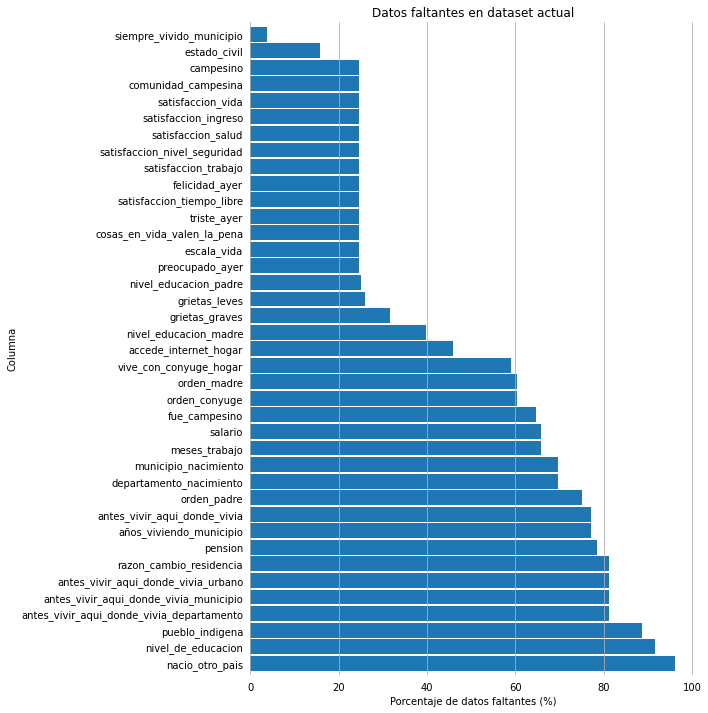

In [54]:
buffer = pd.DataFrame(buffer, columns=["Columna", "faltantes"])
buffer.set_index('Columna', inplace=True)

plt.figure(figsize=(8, 12))
buffer['faltantes'].sort_values(ascending=False).plot.barh(width=0.9)
plt.box(False)
plt.grid(axis='x')
plt.xlabel('Porcentaje de datos faltantes (%)')
plt.ylabel('Columna')
plt.title('Datos faltantes en dataset actual')
plt.tick_params(bottom=False, left=False)
plt.show()

### Identificación de dato atipico

Falta la misma cantidad de datos en preguntas que no son secundarias

## Transformaciones

In [55]:
df["estado_civil_n"] = df["estado_civil"] 

### Preguntas de selección múltiple

In [56]:
# Solución temporal para categorizar cambiando el sentido númerico
transform_multiple_selection_question(df, "tipo_documento", "TD")
transform_multiple_selection_question(df, "grupo_etnico", "GE")
transform_multiple_selection_question(df, "hogar", "H")
transform_multiple_selection_question(df, "parentesco_jefe_hogar", "PARENTESCO")
transform_multiple_selection_question(df, "estado_civil", "EC")
transform_multiple_selection_question(df, "num_orden", "NO")
transform_multiple_selection_question(df, "nacio_donde_vive", "LN")

### Transformación sexo

In [57]:
# Creación variable guardado númerico
df["sexo_n"] = df.sexo
df.loc[df.sexo_n == 1, "sexo"] = "M"
df.loc[df.sexo_n == 2, "sexo"] = "F"

### Transformación de preguntas cerradas

Las respuestas de preguntas cerradas que están guardadas originalmente como enteros de [1-3] se convierten a booleanos, en caso de no informar o no saber se convierte a NAN.

In [58]:
transformar_pregunta_cerrada(df, 'vive_con_conyuge_hogar')
transformar_pregunta_cerrada(df, "campesino")
transformar_pregunta_cerrada(df, "fue_campesino")
transformar_pregunta_cerrada(df, "comunidad_campesina")
transformar_pregunta_cerrada(df, "siempre_vivido_municipio")
transformar_pregunta_cerrada(df, "digita_fecha_nacimiento")
transformar_pregunta_cerrada(df, "tiene_energia")
transformar_pregunta_cerrada(df, "tiene_acueducto")
transformar_pregunta_cerrada(df, "tiene_alcantarillado")
transformar_pregunta_cerrada(df, "tiene_recoleccion_basuras")
transformar_pregunta_cerrada(df, "accede_internet_hogar")

transformar_pregunta_cerrada(df, "inundaciones")
transformar_pregunta_cerrada(df, "avalanchas")
transformar_pregunta_cerrada(df, "hundimiento_terreno")
transformar_pregunta_cerrada(df, "tormentas")
transformar_pregunta_cerrada(df, "sismo")


transformar_pregunta_cerrada(df, "pintura_soplada")
transformar_pregunta_cerrada(df, "presencia_manchas")
transformar_pregunta_cerrada(df, "presencia_moho")
transformar_pregunta_cerrada(df, "cambios_aspecto_ladrillos")
transformar_pregunta_cerrada(df, "goteras")
transformar_pregunta_cerrada(df, "grietas_leves")
transformar_pregunta_cerrada(df, "grietas_graves")

# NAN significa fallecido
transformar_pregunta_cerrada(df, "padre_vive_en_residencia")
transformar_pregunta_cerrada(df, "madre_vive_en_residencia")

## Datos atipicos

Según las investigaciones y los tratamientos convenientes se hace una limpieza de la data

### Valores vacios en respuestas de satisfacción

Se encuentra en la data que el 24.7% de los datos no tiene una respuesta. Luego de una investigación se encuentra que este número corresponde a toda la población con edad cumplida de 14 años o menos.

Por lo que el tratamiento conveniente es el cambio de estos valores por NAN como no existente y no podrá ser útilizado para modelos matemáticos.

## Eliminación de variables no útiles

Se realiza un sondeo de las variables que originalmente viene en los datasets y eliminarlas para remover ruido para los usuarios del dataset.

**Nota:** Para eliminar una columna se debe justificar este procedimiento, dar una definición y dar una descripción del porqué se eliminó

### Digita fecha nacimiento

**Definición:** 

### Factor de expansión
**Definición:** El factor de expansión es un ponderador que se aplica a cada unidad de estudio en la muestra para obtener una estimación poblacional, y se interpreta como la cantidad de unidades en la población que representa cada unidad en la muestra, ya sea vivienda, hogar o persona. (Citar)
Se considera que esta columna no aporta al aprendizaje estadistico según su contexto 

### Orden
Se elimina debido a que es exactamente igual que la columna Secuencia encuesta

In [59]:
to_delete = ["ORDEN"]
df.drop(to_delete, inplace=True, axis=1)

## Transformación de registros faltantes

In [60]:
for col in df.columns:
  df.loc[df[col] == ' ', col] = np.nan

Cambiar los valores de np.NaN en el salario y las pensiones por 0.

In [61]:
df[["salario", "pension"]] = df[["salario", "pension"]].fillna(0)

Cambiar los valores del nivel educativo mas alto del padre y de la madre en los casos que no hay registros por un 10, lo que corresponde a una respuesta de: "No sabe"

In [62]:
df["nivel_educacion_padre"].fillna(10, inplace=True)
df["nivel_educacion_madre"].fillna(10, inplace=True)

In [63]:
for col in metadata['secciones']['satisfaccion']:
  df[col] = df[col].astype(np.float64)

## Previsualización

In [64]:
", ".join(df.columns)

'P1_DEPARTAMENTO, CLASE, FEX_C, CANT_HOG_COMPLETOS, CANT_HOGARES_VIVIENDA, P2102, P3155, P3156, P1070, P4005, P4015, P4567, P8520, P8520S1A1, P8520S4A1, P4065, P5661, P3157, P3159, año_encuesta, P5000, P5010, P3161, P791, P5018, P5018S1, P5666, P3162, P3163, P3163S1, P8526, P3164, P5022, P5024, P5030, P5032, P5034, P5034S1, P1892, P1892S1, P1892S2, P1892S3, P1892S4, P3165, P5041, P5038, P5044, P5044S1, P5046, P5046S1, P5046S1A1, P5046S1A2, P5046S1A3, P5046S1A4, P5046S1A5, P5046S1A6, P5046S1A7, P5012, P5012S1, P5012S2, P5012S3, P5012S8, P5012S4, P5012S5, P5012S6, P5012S7, P792, P5067, P5067S1, P8530, P5047, P3166, P3167, P3168, P5069, P764, P8534, P3169, P3169S1, P3169S2, P3169S3, P3169S4, P8536, P1698, P1698S1, P8540, P5305, P793, P3171, P3172, P3172S1, P3172S2, P3172S3, P3172S4, P3173, P3174, P3174S1, P3174S2, P3174S3, P3174S4, P3174S5, I_HOGAR, I_UGASTO, PERCAPITA, I_OU, P6090, P768, P6100, P6115, P5669, P5669S1, P8551, P6181, P798, P799, P799S2, P799S3, P799S1, P799S4, P799S5, P3176

In [65]:
sample = df.sample(n=15)
sample[metadata['secciones']['basicos']]

,hogar,estado_civil,digita_fecha_nacimiento,I_HOGAR,id_persona_hogar,años_cumplidos,parentesco_jefe_hogar,num_orden,cantidad_personas_hogar,nivel_de_educacion,sexo,id_visita,estado_de_salud,tipo_documento
71996,H7384252,EC2,True,1.460000e+06,1.0,45.0,PARENTESCO1.0,NO1.0,4.0,NaN,M,1.0,2.0,TD3.0
73249,H7385867,EC2,True,1.500000e+06,1.0,51.0,PARENTESCO1.0,NO1.0,2.0,NaN,M,1.0,2.0,TD3.0
236290,H7384039,EC2,True,NaN,1.0,44.0,PARENTESCO2.0,NO2.0,NaN,NaN,F,2.0,2.0,TD3.0
4133,H7252408,EC5,True,7.100000e+05,1.0,74.0,PARENTESCO1.0,NO1.0,2.0,NaN,F,1.0,2.0,TD3.0
33798,H7338930,EC5,True,9.000000e+05,1.0,24.0,PARENTESCO1.0,NO1.0,4.0,NaN,M,1.0,2.0,TD5.0
75714,H7388905,EC4,True,1.552500e+06,1.0,45.0,PARENTESCO1.0,NO1.0,5.0,NaN,F,1.0,2.0,TD3.0
3420,H7251489,EC4,True,1.300000e+06,1.0,27.0,PARENTESCO1.0,NO1.0,2.0,NaN,F,1.0,1.0,TD3.0
73397,H7386044,EC2,True,4.500000e+05,1.0,54.0,PARENTESCO1.0,NO1.0,1.0,NaN,M,1.0,2.0,TD3.0
177562,H7349404,EC,True,NaN,1.0,2.0,PARENTESCO4.0,NO4.0,NaN,NaN,F,4.0,2.0,TD1.0
144081,H7330464,EC5,True,NaN,1.0,10.0,PARENTESCO3.0,NO2.0,NaN,NaN,F,4.0,2.0,TD2.0


In [66]:
sample[metadata['secciones']['basicos']].describe()

,I_HOGAR,id_persona_hogar,años_cumplidos,cantidad_personas_hogar,id_visita,estado_de_salud
count,9.000000e+00,15.0,15.000000,9.000000,15.000000,15.000000
mean,1.177710e+06,1.0,34.066667,2.777778,2.333333,1.666667
std,4.035807e+05,0.0,20.408215,1.481366,1.951800,0.487950
min,4.500000e+05,1.0,2.000000,1.000000,1.000000,1.000000
25%,9.000000e+05,1.0,22.500000,2.000000,1.000000,1.000000
50%,1.300000e+06,1.0,39.000000,2.000000,1.000000,2.000000
75%,1.500000e+06,1.0,46.500000,4.000000,4.000000,2.000000
max,1.552500e+06,1.0,74.000000,5.000000,7.000000,2.000000


In [67]:
sample[metadata['secciones']['identificacion'] + metadata['secciones']['satisfaccion']]

,hogar,id_visita,id_persona_hogar,sexo,años_cumplidos,satisfaccion_vida,satisfaccion_ingreso,satisfaccion_salud,satisfaccion_nivel_seguridad,satisfaccion_trabajo,satisfaccion_tiempo_libre,felicidad_ayer,preocupado_ayer,triste_ayer,cosas_en_vida_valen_la_pena,escala_vida
71996,H7384252,1.0,1.0,M,45.0,8.0,7.0,8.0,9.0,7.0,7.0,8.0,4.0,1.0,8.0,8.0
73249,H7385867,1.0,1.0,M,51.0,9.0,8.0,9.0,6.0,7.0,7.0,8.0,3.0,3.0,8.0,8.0
236290,H7384039,2.0,1.0,F,44.0,8.0,8.0,10.0,10.0,9.0,7.0,7.0,2.0,3.0,9.0,7.0
4133,H7252408,1.0,1.0,F,74.0,10.0,8.0,10.0,5.0,8.0,9.0,7.0,0.0,0.0,10.0,9.0
33798,H7338930,1.0,1.0,M,24.0,10.0,8.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,10.0,9.0
75714,H7388905,1.0,1.0,F,45.0,8.0,7.0,7.0,7.0,6.0,6.0,10.0,3.0,0.0,10.0,7.0
3420,H7251489,1.0,1.0,F,27.0,9.0,8.0,10.0,10.0,10.0,5.0,9.0,5.0,2.0,10.0,10.0
73397,H7386044,1.0,1.0,M,54.0,8.0,2.0,8.0,8.0,8.0,7.0,2.0,2.0,8.0,8.0,6.0
177562,H7349404,4.0,1.0,F,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144081,H7330464,4.0,1.0,F,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
sample[metadata['secciones']['identificacion'] + metadata['secciones']['satisfaccion']].describe()

,id_visita,id_persona_hogar,años_cumplidos,satisfaccion_vida,satisfaccion_ingreso,satisfaccion_salud,satisfaccion_nivel_seguridad,satisfaccion_trabajo,satisfaccion_tiempo_libre,felicidad_ayer,preocupado_ayer,triste_ayer,cosas_en_vida_valen_la_pena,escala_vida
count,15.000000,15.0,15.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2.333333,1.0,34.066667,9.000000,7.083333,9.166667,8.083333,8.166667,7.250000,7.916667,2.166667,1.416667,9.250000,8.166667
std,1.951800,0.0,20.408215,0.852803,2.503028,1.114641,1.831955,1.466804,2.050499,2.274696,2.329000,2.391589,0.965307,1.267304
min,1.000000,1.0,2.000000,8.000000,2.000000,7.000000,5.000000,6.000000,3.000000,2.000000,0.000000,0.000000,8.000000,6.000000
25%,1.000000,1.0,22.500000,8.000000,7.000000,8.000000,6.750000,7.000000,6.750000,7.000000,0.000000,0.000000,8.000000,7.000000
50%,1.000000,1.0,39.000000,9.000000,8.000000,10.000000,8.500000,8.000000,7.000000,8.500000,2.000000,0.000000,10.000000,8.000000
75%,4.000000,1.0,46.500000,10.000000,8.000000,10.000000,10.000000,9.250000,9.000000,9.250000,3.250000,2.250000,10.000000,9.000000
max,7.000000,1.0,74.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000,8.000000,10.000000,10.000000


In [69]:
sample[["tiene_energia", "tiene_acueducto"]]

,tiene_energia,tiene_acueducto
71996,True,True
73249,True,True
236290,NaN,NaN
4133,True,True
33798,True,True
75714,True,True
3420,True,True
73397,True,True
177562,NaN,NaN
144081,NaN,NaN


In [70]:
df.sort_values("hogar", inplace=True)
df.reset_index(inplace=True)
df.drop("index", axis="columns", inplace=True)

## Almacenamiento de datos

Por último se almacenan los datos sobre la carpeta base de los datasets

In [71]:
dataframe_name_to_export = "formatted_data.csv"
df.to_csv(base + "/" + dataframe_name_to_export, index=False)
print(f"Revisar la existencia de {dataframe_name_to_export} en la carpeta {base} en el trabajo 1")

Revisar la existencia de formatted_data.csv en la carpeta datasets en el trabajo 1


In [72]:
import json
with open(base + '/metadata.json', 'w') as outfile:
    json.dump(json.dumps(metadata), outfile)

### Testeos

In [73]:
data_to_test = pd.read_csv(base + "/" + dataframe_name_to_export)
assert list(data_to_test.columns) == list(df.columns)
assert data_to_test.shape == df.shape
print("Pasó los testeos")
del data_to_test

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (522,546) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Pasó los testeos


In [74]:
with open(base + '/metadata.json', 'r') as outfile:
    a = json.loads(json.load(outfile))
    assert a == metadata